In [1]:
def hsv_to_rgb(h, s, v):
    """
    Convert HSV to RGB.

    Parameters:
    h (float): Hue value (0 <= h < 360).
    s (float): Saturation value (0 <= s <= 1).
    v (float): Brightness value (0 <= v <= 1).

    Returns:
    tuple: (r, g, b) where 0 <= r, g, b <= 255
    """
    r, g, b = hsv_to_rgbn(h,s,v)
    return int(r * 255), int(g * 255), int(b * 255)

def hsv_to_rgbn(h, s, v):
    h = float(h)
    s = float(s)
    v = float(v)
    h60 = h / 60.0
    h60f = h60 - int(h60)
    p = v * (1.0 - s)
    q = v * (1.0 - s * h60f)
    t = v * (1.0 - s * (1.0 - h60f))
    
    if 0 <= h60 < 1:
        r, g, b = v, t, p
    elif 1 <= h60 < 2:
        r, g, b = q, v, p
    elif 2 <= h60 < 3:
        r, g, b = p, v, t
    elif 3 <= h60 < 4:
        r, g, b = p, q, v
    elif 4 <= h60 < 5:
        r, g, b = t, p, v
    elif 5 <= h60 < 6:
        r, g, b = v, p, q
    else:
        r, g, b = 0, 0, 0

    return r,g,b

def rgb_to_hex(r, g, b):
    """
    Convert RGB to hex.

    Parameters:
    r (int): Red value (0 <= r <= 255).
    g (int): Green value (0 <= g <= 255).
    b (int): Blue value (0 <= b <= 255).

    Returns:
    str: Hex color string.
    """
    return "#{:02x}{:02x}{:02x}".format(r, g, b)

def find_intersection_points(xa, ya, xb, yb):
    # Calculate the slope (m) and y-intercept (c) of the line
    m = (yb - ya) / (xb - xa)
    c = ya - m * xa
    
    # Initialize an empty list to store the valid intersection points
    points = set()
    
    # Intersection with x = 0
    y = c
    if 0 <= y <= 1:
        points.add((0, y))
    
    # Intersection with x = 1
    y = m + c
    if 0 <= y <= 1:
        points.add((1, y))
    
    # Intersection with y = 0
    if m != 0:  # Avoid division by zero
        x = -c / m
        if 0 <= x <= 1:
            points.add((x, 0))
    
    # Intersection with y = 1
    if m != 0:  # Avoid division by zero
        x = (1 - c) / m
        if 0 <= x <= 1:
            points.add((x, 1))
    
    # Return the intersection points
    return points

def generate_hsv_line(h: float, s: float, b: float, n: int) -> list[tuple[float, float, float]]:
    """
    Generate a list of HSV colors along the line from the brightest to the darkest point.
    
    Parameters:
    h (float): Hue value.
    s (float): Saturation value.
    b (float): Brightness value.
    n (int): Number of colors to generate.
    
    Returns:
    list of tuple: List of HSV colors.
    """
    points = find_intersection_points(0, 1, s, b)
    _,(x2,y2) = points
    
    # Generate the list of HSV colors
    hsv_colors = [(h, (i * (x2/n)), 1-(i * ((1-y2)/n))) for i in range(n)]
    return hsv_colors


In [23]:
%pip install pillow numpy matplotlib scipy

     |████████████████████████████████| 23.1 MB 12.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [55]:
from PIL import Image, ImageDraw

def draw_color_swatch(color_matrix, square_size=20, output_file='color_swatch.png'):
    """
    Draws a color swatch representing a matrix of HSV color values.

    Parameters:
    color_matrix (list of list of tuples): Matrix of HSV tuples.
    square_size (int): Size of each color square. Default is 20.
    output_file (str): Filename to save the generated image. Default is 'color_swatch.png'.

    Returns:
    None
    """
    rows = len(color_matrix)
    cols = max(len(row) for row in color_matrix) if rows > 0 else 0

    # Create an image with the appropriate size
    img_width = cols * square_size
    img_height = rows * square_size
    image = Image.new('RGB', (img_width, img_height), 'white')
    draw = ImageDraw.Draw(image)

    # Draw the squares
    for row in range(rows):
        for col in range(len(color_matrix[row])):
            color = hsv_to_rgb(*color_matrix[row][col])
            top_left = (col * square_size, row * square_size)
            bottom_right = ((col + 1) * square_size - 1, (row + 1) * square_size - 1)
            draw.rectangle([top_left, bottom_right], fill=color)

    # Save the image
    image.save(output_file)
    print(f'Color swatch saved as {output_file}')


In [4]:
hsvs = [
	(0, 1, 0.60), # red
	(27, 1, 0.86), # orange
	(51, 0.95, 0.84), # yellow
	(122, 0.98, 0.35), # green
	(223, 0.99, 0.87), # blue
	(265, 0.98, 0.51), # indigo
	(278, 0.94, 0.75), # violet
	(32, 1, 0.25), # brown
	(85, 0.88, 0.75), # lime
	(180, 0.93, 0.75), # cyan
	(212, 0.70, 0.89), # sky blue
	(241, 0.98, 0.45), # deep blue
	(286, 0.81, 0.61), # purple
	(330, 1, 0.79), # pink
]
n = 8     # Number of colors to generate

color_list = [generate_hsv_line(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='colourblocks-xkcd.png')

color_list

Color swatch saved as colourblocks-xkcd.png


[[(0, 0.0, 1.0),
  (0, 0.125, 0.95),
  (0, 0.25, 0.9),
  (0, 0.375, 0.85),
  (0, 0.5, 0.8),
  (0, 0.625, 0.75),
  (0, 0.75, 0.7),
  (0, 0.875, 0.6499999999999999)],
 [(27, 0.0, 1.0),
  (27, 0.125, 0.9825),
  (27, 0.25, 0.965),
  (27, 0.375, 0.9475),
  (27, 0.5, 0.9299999999999999),
  (27, 0.625, 0.9125),
  (27, 0.75, 0.895),
  (27, 0.875, 0.8775)],
 [(51, 0.0, 1.0),
  (51, 0.125, 0.9789473684210526),
  (51, 0.25, 0.9578947368421052),
  (51, 0.375, 0.9368421052631579),
  (51, 0.5, 0.9157894736842105),
  (51, 0.625, 0.894736842105263),
  (51, 0.75, 0.8736842105263157),
  (51, 0.875, 0.8526315789473684)],
 [(122, 0.0, 1.0),
  (122, 0.125, 0.9170918367346939),
  (122, 0.25, 0.8341836734693877),
  (122, 0.375, 0.7512755102040816),
  (122, 0.5, 0.6683673469387754),
  (122, 0.625, 0.5854591836734693),
  (122, 0.75, 0.5025510204081632),
  (122, 0.875, 0.4196428571428571)],
 [(223, 0.0, 1.0),
  (223, 0.125, 0.9835858585858586),
  (223, 0.25, 0.9671717171717171),
  (223, 0.375, 0.950757575757575

In [5]:
hsvs = [
	(355, 0.99, 0.81), # red
	(31, 0.94, 0.99), # orange
	(50, 0.94, 0.94), # yellow
	(115, 0.90, 0.72), # green
	(212, 0.99, 0.84), # blue
	(249, 0.75, 0.81), # indigo
	(258, 0.60, 0.91), # violet
	(25, 0.88, 0.47), # brown
	(70, 0.81, 0.78), # lime
	(178, 0.99, 0.84), # cyan
	(194, 0.63, 0.92), # sky blue
	(215, 0.74, 0.55), # deep blue
	(272, 0.79, 0.89), # purple
	(343, 0.21, 0.97), # pink
	(313, 0.79, 0.97), # magenta v1
	(301, 0.71, 0.98), # magenta v1
]
n = 12     # Number of colors to generate

color_list = [[(h,s,v)] + generate_hsv_line(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='colourblocks-wiki.png')

color_list

Color swatch saved as colourblocks-wiki.png


[[(355, 0.99, 0.81),
  (355, 0.0, 1.0),
  (355, 0.08333333333333333, 0.984006734006734),
  (355, 0.16666666666666666, 0.968013468013468),
  (355, 0.25, 0.952020202020202),
  (355, 0.3333333333333333, 0.9360269360269361),
  (355, 0.41666666666666663, 0.9200336700336701),
  (355, 0.5, 0.9040404040404041),
  (355, 0.5833333333333333, 0.8880471380471381),
  (355, 0.6666666666666666, 0.8720538720538721),
  (355, 0.75, 0.8560606060606062),
  (355, 0.8333333333333333, 0.8400673400673402),
  (355, 0.9166666666666666, 0.8240740740740742)],
 [(31, 0.94, 0.99),
  (31, 0.0, 1.0),
  (31, 0.08333333333333333, 0.999113475177305),
  (31, 0.16666666666666666, 0.99822695035461),
  (31, 0.25, 0.9973404255319149),
  (31, 0.3333333333333333, 0.9964539007092199),
  (31, 0.41666666666666663, 0.9955673758865249),
  (31, 0.5, 0.9946808510638299),
  (31, 0.5833333333333333, 0.9937943262411347),
  (31, 0.6666666666666666, 0.9929078014184397),
  (31, 0.75, 0.9920212765957447),
  (31, 0.8333333333333333, 0.9911347

In [6]:
n = 16     # Number of colors to generate

hues = [0, 25, 30, 50, 85, 120, 180, 210, 225, 240, 265, 280, 285, 330]

color_list = \
    [[hsv_to_rgb(h1, s1, v1) for (h1, s1, v1) in generate_hsv_line(h, 1, 0.8, n)] for h in hues] + \
    [[hsv_to_rgb(h1, s1, v1) for (h1, s1, v1) in generate_hsv_line(h, 1, 0.6, n)] for h in hues] + \
    [[hsv_to_rgb(h1, s1, v1) for (h1, s1, v1) in generate_hsv_line(h, 1, 0.4, n)] for h in hues]

draw_color_swatch(color_list, square_size=20, output_file='explorative.png')

color_list

Color swatch saved as explorative.png


[[(255, 255, 255),
  (251, 236, 236),
  (248, 217, 217),
  (245, 199, 199),
  (242, 181, 181),
  (239, 164, 164),
  (235, 147, 147),
  (232, 130, 130),
  (229, 114, 114),
  (226, 99, 99),
  (223, 83, 83),
  (219, 68, 68),
  (216, 54, 54),
  (213, 40, 40),
  (210, 26, 26),
  (207, 12, 12)],
 [(255, 255, 255),
  (251, 242, 236),
  (248, 230, 217),
  (245, 218, 199),
  (242, 206, 181),
  (239, 195, 164),
  (235, 184, 147),
  (232, 173, 130),
  (229, 162, 114),
  (226, 152, 99),
  (223, 141, 83),
  (219, 131, 68),
  (216, 121, 54),
  (213, 112, 40),
  (210, 102, 26),
  (207, 93, 12)],
 [(255, 255, 255),
  (251, 243, 236),
  (248, 233, 217),
  (245, 222, 199),
  (242, 211, 181),
  (239, 201, 164),
  (235, 191, 147),
  (232, 181, 130),
  (229, 172, 114),
  (226, 162, 99),
  (223, 153, 83),
  (219, 144, 68),
  (216, 135, 54),
  (213, 126, 40),
  (210, 118, 26),
  (207, 110, 12)],
 [(255, 255, 255),
  (251, 249, 236),
  (248, 243, 217),
  (245, 237, 199),
  (242, 232, 181),
  (239, 226, 164),


Matplotlib is building the font cache; this may take a moment.


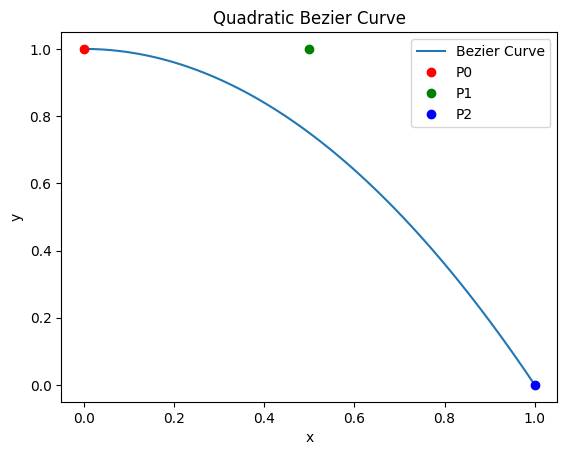

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def bezier_curve(P0, P1, P2, num_points=100):
    t_values = np.linspace(0, 1, num_points)
    curve_points = []

    for t in t_values:
        x = (1 - t)**2 * P0[0] + 2 * (1 - t) * t * P1[0] + t**2 * P2[0]
        y = (1 - t)**2 * P0[1] + 2 * (1 - t) * t * P1[1] + t**2 * P2[1]
        curve_points.append((x, y))

    return np.array(curve_points)

# Example control points
P0 = (0, 1)
P1 = (0.5, 1)
P2 = (1, 0)

# Generate the Bezier curve points
curve_points = bezier_curve(P0, P1, P2)

# Plot the curve and control points
plt.plot(curve_points[:, 0], curve_points[:, 1], label='Bezier Curve')
plt.plot(*P0, 'ro', label='P0')
plt.plot(*P1, 'go', label='P1')
plt.plot(*P2, 'bo', label='P2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Bezier Curve')
plt.show()


In [10]:
def generate_hsv_curve(h: float, s: float, b: float, n: int) -> list[tuple[float, float, float]]:
    """
    Generate a list of HSV colors along a bezier curve from the brightest to the darkest point.
    
    Parameters:
    h (float): Hue value.
    s (float): Saturation value.
    b (float): Brightness value.
    n (int): Number of colors to generate.
    
    Returns:
    list of tuple: List of HSV colors.
    """
    points = bezier_curve((0,1), (s,b), (1,b/2), num_points=n+1)
    
    # Generate the list of HSV colors
    hsv_colors = [(h, s_, b_) for s_, b_ in points[1:]]
    return hsv_colors

In [11]:
hsvs = [
	(355, 0.99, 0.81), # red
	(31, 0.94, 0.99), # orange
	(50, 0.94, 0.94), # yellow
	(115, 0.90, 0.72), # green
	(212, 0.99, 0.84), # blue
	(249, 0.75, 0.81), # indigo
	(258, 0.60, 0.91), # violet
	(25, 0.88, 0.47), # brown
	(70, 0.81, 0.78), # lime
	(178, 0.99, 0.84), # cyan
	(194, 0.63, 0.92), # sky blue
	(215, 0.74, 0.55), # deep blue
	(272, 0.79, 0.89), # purple
	(343, 0.21, 0.97), # pink v1
	(329, 0.14, 0.99), # pink v2
	(328, 0.48, 0.97), # pink v3
	(313, 0.79, 0.97), # magenta v1
	(301, 0.71, 0.98), # magenta v1
]
n = 12     # Number of colors to generate

color_list = [[(h,s,v)] + generate_hsv_curve(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='colourblocks-wiki-curve.png')

color_list

Color swatch saved as colourblocks-wiki-curve.png


[[(355, 0.99, 0.81),
  (355, np.float64(0.15819444444444444), np.float64(0.9668402777777777)),
  (355, np.float64(0.3027777777777778), np.float64(0.9306944444444445)),
  (355, np.float64(0.43374999999999997), np.float64(0.8915624999999999)),
  (355, np.float64(0.5511111111111111), np.float64(0.8494444444444446)),
  (355, np.float64(0.6548611111111111), np.float64(0.804340277777778)),
  (355, np.float64(0.745), np.float64(0.7562500000000001)),
  (355, np.float64(0.8215277777777777), np.float64(0.7051736111111112)),
  (355, np.float64(0.8844444444444444), np.float64(0.6511111111111112)),
  (355, np.float64(0.93375), np.float64(0.5940625)),
  (355, np.float64(0.9694444444444444), np.float64(0.5340277777777779)),
  (355, np.float64(0.9915277777777778), np.float64(0.47100694444444446)),
  (355, np.float64(1.0), np.float64(0.405))],
 [(31, 0.94, 0.99),
  (31, np.float64(0.15055555555555553), np.float64(0.9949652777777777)),
  (31, np.float64(0.2888888888888889), np.float64(0.9831944444444446

In [12]:
hsvs = [
	(0, 1, 0.9), # red
	(27, 0.98, 0.98), # orange
	(60, 0.92, 1), # yellow
	(122, 0.88, 0.69), # green
	(223, 0.99, 0.87), # blue
	(265, 0.98, 0.51), # indigo
	(278, 0.94, 0.92), # violet
	(33, 1, 0.40), # brown
	(85, 0.8, 1), # lime
	(180, 1, 1), # cyan
	(209, 0.54, 0.99), # sky blue
	(241, 0.98, 0.45), # deep blue
	(286, 0.81, 0.61), # purple
	(330, 0.49, 1), # pink
	(323, 1, 0.76), # magenta
	(202, 0.03, 0.58), # grey
]
n = 12     # Number of colors to generate

color_list = [[(h,s,v)] + generate_hsv_curve(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='colourblocks-xkcd-curve.png')

color_list

Color swatch saved as colourblocks-xkcd-curve.png


[[(0, 1, 0.9),
  (0, np.float64(0.1597222222222222), np.float64(0.9809027777777777)),
  (0, np.float64(0.3055555555555556), np.float64(0.9569444444444445)),
  (0, np.float64(0.4375), np.float64(0.928125)),
  (0, np.float64(0.5555555555555556), np.float64(0.8944444444444446)),
  (0, np.float64(0.6597222222222222), np.float64(0.8559027777777779)),
  (0, np.float64(0.75), np.float64(0.8125)),
  (0, np.float64(0.8263888888888888), np.float64(0.7642361111111111)),
  (0, np.float64(0.8888888888888888), np.float64(0.7111111111111111)),
  (0, np.float64(0.9375), np.float64(0.653125)),
  (0, np.float64(0.9722222222222222), np.float64(0.5902777777777779)),
  (0, np.float64(0.9930555555555556), np.float64(0.5225694444444445)),
  (0, np.float64(1.0), np.float64(0.45))],
 [(27, 0.98, 0.98),
  (27, np.float64(0.15666666666666665), np.float64(0.9934027777777776)),
  (27, np.float64(0.30000000000000004), np.float64(0.9802777777777779)),
  (27, np.float64(0.43), np.float64(0.960625)),
  (27, np.float64

In [13]:
hsvs = [
	(354, 0.96, 0.84), # red
	(31, 0.91, 0.98), # orange
	(50, 0.93, 0.93), # yellow
	(115, 0.89, 0.73), # green
	(211, 1, 0.83), # blue
	(259, 1, 0.59), # indigo
	(262, 0.69, 0.87), # violet
	(26, 0.81, 0.55), # brown
	(59, 0.76, 0.78), # lime
	(180, 0.58, 0.79), # cyan
	(194, 0.58, 0.93), # sky blue
	(216, 0.95, 0.36), # deep blue
	(277, 0.74, 0.84), # purple
	(0, 0.25, 0.89), # pink
	(310, 0.67, 0.87), # magenta
	# (202, 0.03, 0.58), # grey
]
n = 12     # Number of colors to generate

color_list = [[(h,s,v)] + generate_hsv_curve(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='colourblocks-onscreen-curve.png')

color_list

Color swatch saved as colourblocks-onscreen-curve.png


[[(354, 0.96, 0.84),
  (354, np.float64(0.1536111111111111), np.float64(0.9715277777777777)),
  (354, np.float64(0.29444444444444445), np.float64(0.9394444444444445)),
  (354, np.float64(0.4225), np.float64(0.9037499999999999)),
  (354, np.float64(0.5377777777777778), np.float64(0.8644444444444446)),
  (354, np.float64(0.6402777777777777), np.float64(0.8215277777777777)),
  (354, np.float64(0.73), np.float64(0.7749999999999999)),
  (354, np.float64(0.8069444444444444), np.float64(0.7248611111111112)),
  (354, np.float64(0.8711111111111112), np.float64(0.6711111111111111)),
  (354, np.float64(0.9225), np.float64(0.61375)),
  (354, np.float64(0.961111111111111), np.float64(0.5527777777777778)),
  (354, np.float64(0.9869444444444444), np.float64(0.48819444444444443)),
  (354, np.float64(1.0), np.float64(0.42))],
 [(31, 0.91, 0.98),
  (31, np.float64(0.14597222222222223), np.float64(0.9934027777777776)),
  (31, np.float64(0.2805555555555556), np.float64(0.9802777777777779)),
  (31, np.floa

In [14]:
hsvs = [
	(0, 0.98, 0.89), # red
	(15, 0.98, 0.89), # vermilion
	(29, 1, 1), # orange
	(46, 1, 1), # amber
	(58, 1, 1), # yellow
	(73, 0.94, 0.88), # chartreuse
	(120, 1, 0.8), # green
	(181, 1, 0.89), # teal
	(240, 1, 0.89), # blue
	(269, 0.98, 0.9), # purple
	(299, 0.98, 0.89), # violet
	(331, 0.96, 0.9), # magenta
	(28, 0.78, 0.38), # brown
	(203, 0.54, 0.46), # slate
	(59, 0.49, 0.4), # olive
]
n = 12     # Number of colors to generate

color_list = [[(h,s,v)] + generate_hsv_curve(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='ryb-mixing.png')

color_list

Color swatch saved as ryb-mixing.png


[[(0, 0.98, 0.89),
  (0, np.float64(0.15666666666666665), np.float64(0.9793402777777777)),
  (0, np.float64(0.30000000000000004), np.float64(0.9540277777777779)),
  (0, np.float64(0.43), np.float64(0.9240625)),
  (0, np.float64(0.5466666666666666), np.float64(0.8894444444444445)),
  (0, np.float64(0.6499999999999999), np.float64(0.8501736111111111)),
  (0, np.float64(0.74), np.float64(0.80625)),
  (0, np.float64(0.8166666666666667), np.float64(0.7576736111111113)),
  (0, np.float64(0.88), np.float64(0.7044444444444444)),
  (0, np.float64(0.9299999999999999), np.float64(0.6465624999999999)),
  (0, np.float64(0.9666666666666667), np.float64(0.5840277777777778)),
  (0, np.float64(0.99), np.float64(0.5168402777777777)),
  (0, np.float64(1.0), np.float64(0.445))],
 [(15, 0.98, 0.89),
  (15, np.float64(0.15666666666666665), np.float64(0.9793402777777777)),
  (15, np.float64(0.30000000000000004), np.float64(0.9540277777777779)),
  (15, np.float64(0.43), np.float64(0.9240625)),
  (15, np.float

In [15]:
hues = [355, 0, 15, 30, 50, 60, 75, 120, 180, 200, 240, 270, 300, 330]

n = 12     # Number of colors to generate

color_list = []

for h in hues:
    color_list += [[(h,0.8,b)] + generate_hsv_curve(h, 0.8, b, n) for b in [1, 0.8, 0.6, 0.4]]

draw_color_swatch(color_list, square_size=20, output_file='experimental-curve.png')

color_list

Color swatch saved as experimental-curve.png


[[(355, 0.8, 1),
  (355, np.float64(0.12916666666666665), np.float64(0.9965277777777777)),
  (355, np.float64(0.25), np.float64(0.9861111111111112)),
  (355, np.float64(0.36250000000000004), np.float64(0.96875)),
  (355, np.float64(0.46666666666666673), np.float64(0.9444444444444446)),
  (355, np.float64(0.5625), np.float64(0.9131944444444445)),
  (355, np.float64(0.65), np.float64(0.875)),
  (355, np.float64(0.7291666666666666), np.float64(0.8298611111111112)),
  (355, np.float64(0.8), np.float64(0.7777777777777778)),
  (355, np.float64(0.8625), np.float64(0.71875)),
  (355, np.float64(0.9166666666666666), np.float64(0.6527777777777779)),
  (355, np.float64(0.9624999999999999), np.float64(0.5798611111111112)),
  (355, np.float64(1.0), np.float64(0.5))],
 [(355, 0.8, 0.8),
  (355, np.float64(0.12916666666666665), np.float64(0.9652777777777777)),
  (355, np.float64(0.25), np.float64(0.9277777777777778)),
  (355, np.float64(0.36250000000000004), np.float64(0.8875000000000001)),
  (355, n

In [16]:
def luminance(red, green, blue):
    return (red * 0.2126) + (green * 0.7152) + (blue * 0.0722)

lmap = dict()
for h in range(0, 360, 9):
    lmap[h] = (1 - (luminance(*hsv_to_rgb(h,1,1))/255))*10
    
lmap

{0: 7.874,
 9: 6.808211764705883,
 18: 5.742423529411765,
 27: 4.676635294117647,
 36: 3.5828000000000007,
 45: 2.517011764705883,
 54: 1.4512235294117648,
 63: 0.8303843137254907,
 72: 1.1472000000000004,
 81: 1.4723529411764713,
 90: 1.789168627450981,
 99: 2.1059843137254908,
 108: 2.4311372549019614,
 117: 2.7479529411764716,
 126: 2.77721568627451,
 135: 2.6696235294117656,
 144: 2.5620313725490207,
 153: 2.4516078431372557,
 162: 2.3440156862745107,
 171: 2.2364235294117654,
 180: 2.1260000000000012,
 189: 3.219835294117648,
 198: 4.285623529411766,
 207: 5.351411764705882,
 216: 6.445247058823529,
 225: 7.511035294117647,
 234: 8.576823529411765,
 243: 9.177952941176471,
 252: 8.8528,
 261: 8.53598431372549,
 270: 8.21916862745098,
 279: 7.902352941176471,
 288: 7.58553725490196,
 297: 7.26038431372549,
 306: 7.225615686274509,
 315: 7.333207843137255,
 324: 7.44363137254902,
 333: 7.5512235294117644,
 342: 7.65881568627451,
 351: 7.766407843137255}

In [17]:
luminances = list(range(0,255,25))
luminances

[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

In [18]:
def determine_brightness(h, s, target_luminance, tolerance=1e-5):
    v_min, v_max = 0.0, 1.0
    
    while v_max - v_min > tolerance:
        v_mid = (v_min + v_max) / 2
        r, g, b = hsv_to_rgb(h, s, v_mid)
        current_luminance = luminance(r, g, b)
        
        if current_luminance < target_luminance:
            v_min = v_mid
        else:
            v_max = v_mid
    
    return v_mid

# Example usage
color_map = []
for h in range(0, 360, 9):
	for target_luminance in reversed(luminances):
		colors = []
		for s in range(10):
			s = (s+1)/10
			b = determine_brightness(h, s, target_luminance)
			colors.append((h,s,b))
		color_map.append(colors)

draw_color_swatch(color_map, square_size=20, output_file='test.png')

Color swatch saved as test.png


In [19]:
color_map

[[(0, 0.1, 0.9999923706054688),
  (0, 0.2, 0.9999923706054688),
  (0, 0.3, 0.9999923706054688),
  (0, 0.4, 0.9999923706054688),
  (0, 0.5, 0.9999923706054688),
  (0, 0.6, 0.9999923706054688),
  (0, 0.7, 0.9999923706054688),
  (0, 0.8, 0.9999923706054688),
  (0, 0.9, 0.9999923706054688),
  (0, 1.0, 0.9999923706054688)],
 [(0, 0.1, 0.9586105346679688),
  (0, 0.2, 0.9999923706054688),
  (0, 0.3, 0.9999923706054688),
  (0, 0.4, 0.9999923706054688),
  (0, 0.5, 0.9999923706054688),
  (0, 0.6, 0.9999923706054688),
  (0, 0.7, 0.9999923706054688),
  (0, 0.8, 0.9999923706054688),
  (0, 0.9, 0.9999923706054688),
  (0, 1.0, 0.9999923706054688)],
 [(0, 0.1, 0.8540267944335938),
  (0, 0.2, 0.9333267211914062),
  (0, 0.3, 0.9999923706054688),
  (0, 0.4, 0.9999923706054688),
  (0, 0.5, 0.9999923706054688),
  (0, 0.6, 0.9999923706054688),
  (0, 0.7, 0.9999923706054688),
  (0, 0.8, 0.9999923706054688),
  (0, 0.9, 0.9999923706054688),
  (0, 1.0, 0.9999923706054688)],
 [(0, 0.1, 0.7450942993164062),
  (0,

In [58]:
def hsl_to_rgbn(h, s, l):
    def f(n):
        k = (n + h / 30) % 12
        a = s * min(l, 1 - l)
        return l - a * max(-1, min(k - 3, 9 - k, 1))
    
    r = f(0)
    g = f(8)
    b = f(4)
    
    return int(r * 255), int(g * 255), int(b * 255)

def hsl_to_rgb(h, s, l):
    r,g,b = hsl_to_rgbn(h,s,l)
    return int(r * 255), int(g * 255), int(b * 255)

def determine_lightness(h, s, target_luminance, tolerance=1e-5):
    l_min, l_max = 0.0, 1.0
    
    while l_max - l_min > tolerance:
        l_mid = (l_min + l_max) / 2
        r, g, b = hsl_to_rgb(h, s, l_mid)
        current_luminance = luminance(r, g, b)
        
        if current_luminance < target_luminance:
            l_min = l_mid
        else:
            l_max = l_mid
    
    return l_mid

def determine_saturation(h, l, target_luminance, tolerance=1e-5):
    s_min, s_max = 0.0, 1.0
    
    while s_max - s_min > tolerance:
        s_mid = (s_min + s_max) / 2
        r, g, b = hsl_to_rgb(h, s_mid, l)
        current_luminance = luminance(r, g, b)
        
        if current_luminance < target_luminance:
            s_min = s_mid
        else:
            s_max = s_mid
    
    return s_mid

def hsl_to_hsv(h, s, l):
    """
    Convert HSL to HSV.

    Parameters:
    h (float): Hue value (0 <= h < 360).
    s (float): Saturation value (0 <= s <= 1).
    l (float): Lightness value (0 <= l <= 1).

    Returns:
    tuple: (h, s_v, v) where 0 <= h < 360, 0 <= s_v <= 1, 0 <= v <= 1
    """
    v = l + s * min(l, 1 - l)
    if v == 0:
        s_v = 0
    else:
        s_v = 2 * (1 - l / v)

    return h, s_v, v

# Example usage
h, s, l = 120, 0.5, 0.4  # Given hue, saturation, and lightness in HSL
hsv_result = hsl_to_hsv(h, s, l)
print(f"HSV: {hsv_result}")


HSV: (120, 0.6666666666666667, 0.6000000000000001)


In [21]:

# Example usage
color_map = []
for h in range(0, 360, 9):
	for target_luminance in reversed(luminances[1:-2]):
		colors = []
		for s in range(10):
			s = (s+1)/10
			l = determine_lightness(h, s, target_luminance)
			colors.append(hsl_to_hsv(h,s,l))
		color_map.append(colors)

draw_color_swatch(color_map, square_size=20, output_file='test2.png')

Color swatch saved as test2.png


In [24]:
from scipy.interpolate import interp1d

def bezier_curve_even_y(P0, P1, P2, num_points=100):
    # Step 1: Generate a high-resolution Bezier curve
    t_values = np.linspace(0, 1, 1000)
    curve_points = []

    for t in t_values:
        x = (1 - t)**2 * P0[0] + 2 * (1 - t) * t * P1[0] + t**2 * P2[0]
        y = (1 - t)**2 * P0[1] + 2 * (1 - t) * t * P1[1] + t**2 * P2[1]
        curve_points.append((x, y))

    curve_points = np.array(curve_points)

    # Step 2: Sort the points by y-coordinate
    curve_points = curve_points[np.argsort(curve_points[:, 1])]

    # Step 3: Interpolate to get evenly spaced y values
    y_values = np.linspace(curve_points[0, 1], curve_points[-1, 1], num_points)
    x_interp = interp1d(curve_points[:, 1], curve_points[:, 0], kind='linear')
    evenly_spaced_curve_points = [(x_interp(y), y) for y in y_values]

    return np.array(evenly_spaced_curve_points)

In [29]:
def luminance(r, g, b):
    # Normalize RGB to [0, 1]
    r = r / 255.0
    g = g / 255.0
    b = b / 255.0
    return (r * 0.2126) + (g * 0.7152) + (b * 0.0722)

def rgb_to_chroma(r, g, b):
    # Normalize RGB to [0, 1]
    r = r / 255.0
    g = g / 255.0
    b = b / 255.0
    
    # Compute chroma as the difference between max and min RGB values
    chroma = max(r, g, b) - min(r, g, b)
    return chroma

# Example usage:
r, g, b = 128, 64, 64
chroma = rgb_to_chroma(r, g, b)
print("Approximate Chroma:", chroma)


Approximate Chroma: 0.25098039215686274


In [63]:
all_mat = []
# for h in range(0, 360, 18):
for h in [353, 19, 31, 40, 50, 58, 71, 109, 151, 162, 172, 182, 193, 202, 212, 266, 283, 305, 326, 340]:
    mat = [[]]*9
    r,g,b = hsl_to_rgb(h,1,0.5)
    value = int(luminance(r,g,b)*10)
    chroma = rgb_to_chroma(r,g,b)
    
    points = bezier_curve_even_y((0,0),(1,value/10),(0,1),11)
    ranges = {int(y*10): int(x*20) for x,y in points[1:-1]}
    # print(ranges)
    for i,length in ranges.items():
        mat[i-1] = [hsl_to_hsv(h,s,determine_lightness(h,s,i/10.0)) for s in [(j+1)/length for j in range(length)]]
    all_mat += reversed(mat)
    # break
# print(all_mat)


draw_color_swatch(all_mat, square_size=20, output_file='test3.png')

Color swatch saved as test3.png
